In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

In [2]:
#脱ブタン塔のプロセスデータを読み込む
df = pd.read_csv('debutanizer_data.csv')

In [3]:
#時系列データなので、実務データを想定しindexに時刻を割り当てる
# 開始日時を指定
start_datetime = '2024-01-01 00:00:00'
# DataFrameの長さを取得
n = len(df)
# 日時インデックスを生成（1分間隔）
date_index = pd.date_range(start=start_datetime, periods=n, freq='T')
# DataFrameのインデックスを新しい日時インデックスに設定
df.index = date_index

In [4]:
# 目的変数の測定時間を考慮（5分間）
df['y'] = df['y'].shift(5)
#yがnanとなる期間のデータを削除
df = df.dropna()
# 説明変数Xと目的変数yに分割
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
df

,x1,x2,x3,x4,x5,x6,x7,y
2024-01-01 00:05:00,0.266419,0.633665,0.774621,0.555084,0.756059,0.811341,0.786373,0.180295
2024-01-01 00:06:00,0.265904,0.654012,0.774420,0.551762,0.766794,0.851661,0.820795,0.177124
2024-01-01 00:07:00,0.265388,0.672287,0.773997,0.548440,0.761244,0.805605,0.822079,0.173618
2024-01-01 00:08:00,0.263477,0.639337,0.762100,0.545118,0.753249,0.811175,0.789002,0.171640
2024-01-01 00:09:00,0.252709,0.662216,0.770372,0.541796,0.745255,0.813164,0.789002,0.166972
...,...,...,...,...,...,...,...,...
2024-01-02 15:49:00,0.284859,0.645894,0.688723,0.355109,0.615583,0.608848,0.500866,0.256710
2024-01-02 15:50:00,0.266139,0.665503,0.665640,0.354275,0.588834,0.582074,0.508999,0.243800
2024-01-02 15:51:00,0.247419,0.665706,0.664740,0.353441,0.561301,0.602186,0.523348,0.228881
2024-01-02 15:52:00,0.228699,0.672975,0.677300,0.352607,0.530730,0.636970,0.537697,0.212624


In [6]:
X

,x1,x2,x3,x4,x5,x6,x7
2024-01-01 00:05:00,0.266419,0.633665,0.774621,0.555084,0.756059,0.811341,0.786373
2024-01-01 00:06:00,0.265904,0.654012,0.774420,0.551762,0.766794,0.851661,0.820795
2024-01-01 00:07:00,0.265388,0.672287,0.773997,0.548440,0.761244,0.805605,0.822079
2024-01-01 00:08:00,0.263477,0.639337,0.762100,0.545118,0.753249,0.811175,0.789002
2024-01-01 00:09:00,0.252709,0.662216,0.770372,0.541796,0.745255,0.813164,0.789002
...,...,...,...,...,...,...,...
2024-01-02 15:49:00,0.284859,0.645894,0.688723,0.355109,0.615583,0.608848,0.500866
2024-01-02 15:50:00,0.266139,0.665503,0.665640,0.354275,0.588834,0.582074,0.508999
2024-01-02 15:51:00,0.247419,0.665706,0.664740,0.353441,0.561301,0.602186,0.523348
2024-01-02 15:52:00,0.228699,0.672975,0.677300,0.352607,0.530730,0.636970,0.537697


In [7]:
y

2024-01-01 00:05:00    0.180295
2024-01-01 00:06:00    0.177124
2024-01-01 00:07:00    0.173618
2024-01-01 00:08:00    0.171640
2024-01-01 00:09:00    0.166972
                         ...   
2024-01-02 15:49:00    0.256710
2024-01-02 15:50:00    0.243800
2024-01-02 15:51:00    0.228881
2024-01-02 15:52:00    0.212624
2024-01-02 15:53:00    0.200764
Freq: T, Name: y, Length: 2389, dtype: float64

In [8]:
def evaluate_performance(X, y, y_train, model, save_to_csv=False, filename='performance.csv'):
    """
    モデルの性能を評価し、結果をプロットします。
    オプションで予測結果をCSVファイルに保存します。
    
    Parameters:
    X : pd.DataFrame
        説明変数のデータセット
    y : pd.Series
        目的変数の値
    y_train : pd.Series
        トレーニングデータの目的変数（標準化解除に使用）
    model : sklearn model
        評価する訓練済みのモデル
    save_to_csv : bool, optional
        結果をCSVファイルに保存するかどうかを指定 (default is False)
    filename : str, optional
        出力するCSVファイルの名前 (default is 'performance.csv')

    Returns:
    r2 : 決定係数R^2
    rmse : RMSE
    mae : MAE
        
    """
    # ｙの推定値を算出
    y_pred = model.predict(X) * y_train.std() + y_train.mean() 

    # 性能指標の算出
    r2 = metrics.r2_score(y, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    mae = metrics.mean_absolute_error(y, y_pred)
    print(f"R^2: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
    
    # プロットの作成
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y_pred, color='blue')
    y_max = max(y.max(), y_pred.max())
    y_min = min(y.min(), y_pred.min()) 
    
     # 取得した最小値-5%から最大値+5%まで、対角線を作成
    plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
             [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
    plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))
    plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    # テキストボックスを右下に配置
    plt.text(0.98, 0.02, f'R^2: {r2:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}', transform=plt.gca().transAxes,
             fontsize=9, verticalalignment='bottom', horizontalalignment='right', 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5))
    plt.title(filename[:-4])
    plt.grid(False)
    plt.axis('equal')
    plt.show()

    # 時系列のプロット
    plt.figure(figsize=(10, 5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # 日時形式を設定
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=5))  # 5時間ごとに目盛りを設定
    plt.plot(y.index, y, label='Actual y', color='blue', marker='', linestyle='-')
    plt.plot(y.index, y_pred, label='Predicted y', color='red', marker='', linestyle='-')
    #plt.gcf().autofmt_xdate()  # x軸のラベルを自動で斜めにして読みやすくする
    plt.ylabel('y')
    plt.title(filename[:-4])
    plt.legend()
    plt.show()
    
    # データの保存
    if save_to_csv:
        results_df = pd.DataFrame({
            'Actual': y,
            'Predicted': y_pred.flatten(),
            'Error': y - y_pred.flatten()
        })
        results_df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")
    
    return r2, rmse, mae

In [9]:
def evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, model, save_csv=False, train_filename='train_performance.csv', test_filename='test_performance.csv'):
    """
    トレーニングデータとテストデータの両方でモデルの性能を評価します。
    
    Parameters:
    X_train_scaled : pd.DataFrame
        標準化されたトレーニングデータの説明変数
    y_train : pd.Series
        トレーニングデータの目的変数
    X_test_scaled : pd.DataFrame
        標準化されたテストデータの説明変数
    y_test : pd.Series
        テストデータの目的変数
    model : sklearn model
        評価する訓練済みのモデル
    save_csv : bool, optional
        結果をCSVファイルに保存するかどうかを指定 (default is False)
    train_filename : str, optional
        トレーニングデータの予測結果を保存するCSVファイルの名前 (default is 'train_performance.csv')
    test_filename : str, optional
        テストデータの予測結果を保存するCSVファイルの名前 (default is 'test_performance.csv')
    """
    print("Evaluating Training Data")
    evaluate_performance(X_train_scaled, y_train, y_train, model, save_to_csv=save_csv, filename=train_filename)
    print("Evaluating Test Data")
    evaluate_performance(X_test_scaled, y_test, y_train, model, save_to_csv=save_csv, filename=test_filename)

In [10]:
def perform_pls_regression(X, y, fold_number=5, test_size=0.4, shuffle=False):
    """
    PLS回帰モデルを構築し、クロスバリデーションを用いて最適な主成分数を決定します。
    その後、最適な主成分数でモデルを再構築し、訓練データとテストデータの性能を評価します。

    Parameters:
    X : pd.DataFrame
        説明変数のデータセット
    y : pd.Series
        目的変数のデータ
    fold_number : int, optional
        クロスバリデーションで使用するフォールドの数 (default is 5)。
    test_size : float, optional
        データを分割する際のテストデータの割合 (default is 0.4)。
    shuffle : bool, optional
        データ分割時にデータをシャッフルするかどうか (時系列データを想定し、デフォルトはFalse)。

    Returns:
    best_components : 最適な主成分数
    standard_regression_coefficients : 標準回帰係数
    beta_train : 回帰係数
    intercept_train : 切片
    """
    # データの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=0)

    # データの標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    # 主成分数を決定するためのクロスバリデーション
    max_components = X_train.shape[1]
    r2_scores = []
    for n_components in range(1, max_components + 1):
        pls = PLSRegression(n_components=n_components)
        y_cv = cross_val_predict(pls, X_train_scaled, y_train_scaled, cv=fold_number)
        r2 = metrics.r2_score(y_train_scaled, y_cv)
        r2_scores.append((n_components, r2))

    # r2_scoresをグラフで表示
    components = [item[0] for item in r2_scores]
    r2_values = [item[1] for item in r2_scores]
    plt.figure(figsize=(8, 5))
    plt.plot(components, r2_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Components')
    plt.ylabel('R2 Score (CV)')
    plt.grid(True)
    plt.show()

    # 最適な主成分数の決定
    best_components = max(r2_scores, key=lambda item: item[1])[0]

    # 最適な主成分数で再度PLSモデルを作成
    pls_final = PLSRegression(n_components=best_components)
    pls_final.fit(X_train_scaled, y_train_scaled)

    # 標準回帰係数の取得
    standard_regression_coefficients = pd.DataFrame(pls_final.coef_, index=X_train.columns,
                                                    columns=['Standard Regression Coefficients'])

    # 回帰係数、切片の算出
    std_X_train = X_train.std()
    std_y_train = y_train.std()
    beta_train = std_y_train * standard_regression_coefficients.iloc[:, 0] / std_X_train
    intercept_train = y_train.mean() - X_train.mean() @ beta_train

    evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, model=pls_final)


    return best_components, standard_regression_coefficients, beta_train, intercept_train

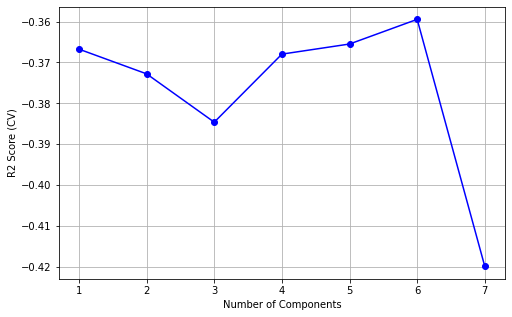

Evaluating Training Data
R^2: 0.072, RMSE: 0.136, MAE: 0.087


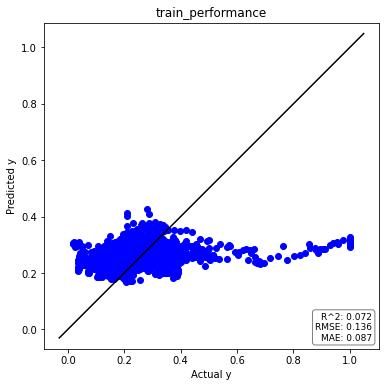

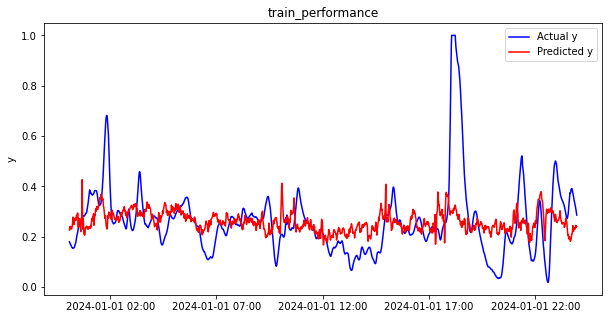

Evaluating Test Data
R^2: -0.029, RMSE: 0.185, MAE: 0.137


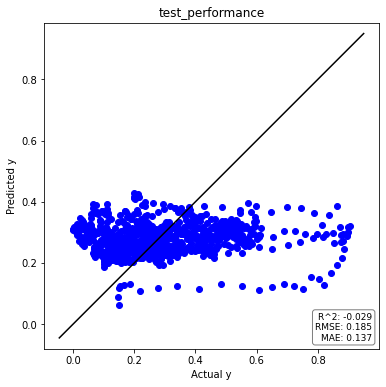

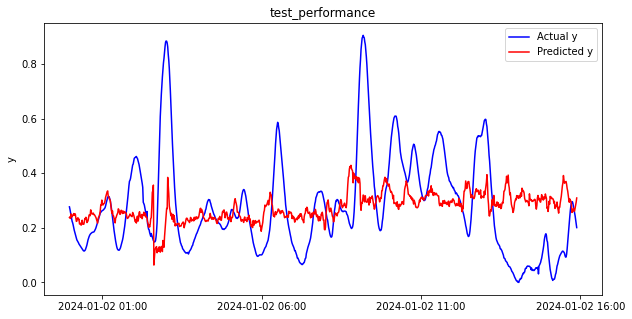

Optimal number of components: 6
Standard regression coefficients:
    Standard Regression Coefficients
x1                          0.186757
x2                          0.074185
x3                         -0.158128
x4                         -0.050160
x5                         -0.265136
x6                          0.124870
x7                          0.087448
Regression coefficients:
x1    0.295105
x2    0.352618
x3   -0.102729
x4   -0.060243
x5   -0.376332
x6    0.128496
x7    0.082486
dtype: float64
Intercept:
0.1536173819289365


In [11]:
# 関数の実行
best_components, standard_regression_coefficients, beta_train, intercept_train = perform_pls_regression(X, y)
print(f"Optimal number of components: {best_components}")
print("Standard regression coefficients:")
print(standard_regression_coefficients)
print("Regression coefficients:")
print(beta_train)
print("Intercept:")
print(intercept_train)

In [12]:
#時間遅れ変数を作成
delay_number = 18
X_with_delays = pd.DataFrame()
for col in X.columns:
    col_name = f"{col}_delay_{delay_number}"
    X_with_delays[col_name] = X[col].shift(delay_number)

# 時間遅れ変数とｙのデータフレームを作成
X_with_delays['y'] = y
X_with_delays = X_with_delays.dropna()

# 目的変数と説明変数に分割
X = X_with_delays.iloc[:, :-1]
y = X_with_delays['y']

In [14]:
X

,x1_delay_18,x2_delay_18,x3_delay_18,x4_delay_18,x5_delay_18,x6_delay_18,x7_delay_18
2024-01-01 00:23:00,0.266419,0.633665,0.774621,0.555084,0.756059,0.811341,0.786373
2024-01-01 00:24:00,0.265904,0.654012,0.774420,0.551762,0.766794,0.851661,0.820795
2024-01-01 00:25:00,0.265388,0.672287,0.773997,0.548440,0.761244,0.805605,0.822079
2024-01-01 00:26:00,0.263477,0.639337,0.762100,0.545118,0.753249,0.811175,0.789002
2024-01-01 00:27:00,0.252709,0.662216,0.770372,0.541796,0.745255,0.813164,0.789002
...,...,...,...,...,...,...,...
2024-01-02 15:49:00,0.416074,0.687306,0.447156,0.092110,0.707569,0.799817,0.744901
2024-01-02 15:50:00,0.452960,0.690182,0.450923,0.086528,0.756901,0.852104,0.788699
2024-01-02 15:51:00,0.489847,0.696795,0.527451,0.080946,0.807678,0.926988,0.843315
2024-01-02 15:52:00,0.502861,0.685284,0.631000,0.075364,0.791265,0.888171,0.824651


In [15]:
y

2024-01-01 00:23:00    0.178346
2024-01-01 00:24:00    0.187134
2024-01-01 00:25:00    0.196053
2024-01-01 00:26:00    0.205045
2024-01-01 00:27:00    0.209524
                         ...   
2024-01-02 15:49:00    0.256710
2024-01-02 15:50:00    0.243800
2024-01-02 15:51:00    0.228881
2024-01-02 15:52:00    0.212624
2024-01-02 15:53:00    0.200764
Freq: T, Name: y, Length: 2371, dtype: float64

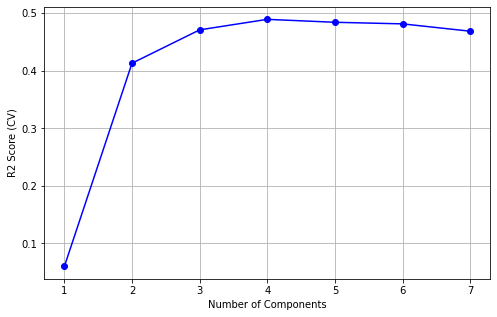

Evaluating Training Data
R^2: 0.618, RMSE: 0.087, MAE: 0.062


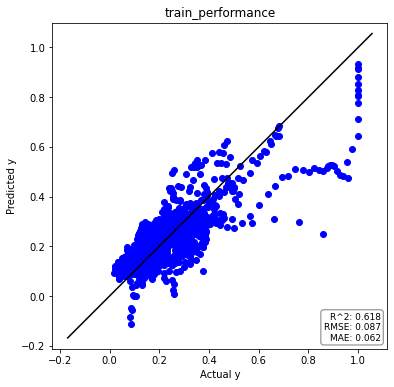

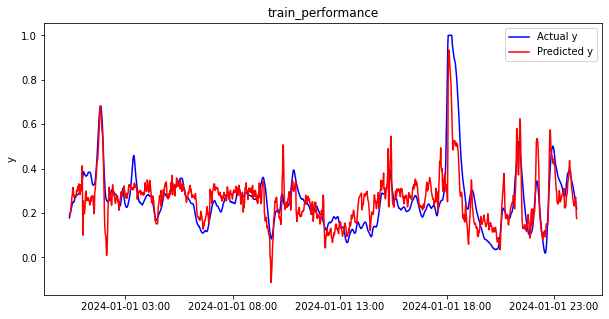

Evaluating Test Data
R^2: 0.551, RMSE: 0.122, MAE: 0.088


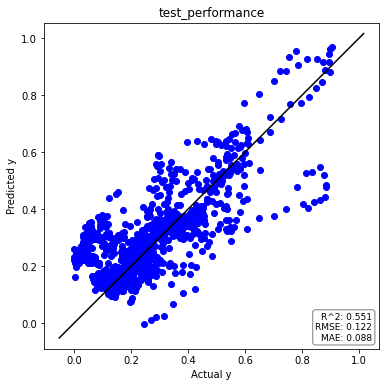

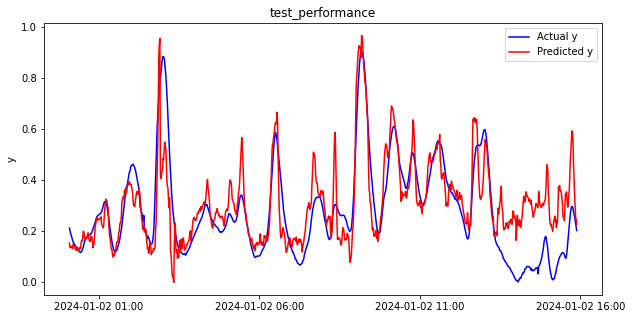

Optimal number of components: 4
Standard regression coefficients:
             Standard Regression Coefficients
x1_delay_18                         -0.004797
x2_delay_18                          0.048520
x3_delay_18                         -0.182735
x4_delay_18                         -0.087011
x5_delay_18                         -0.927922
x6_delay_18                          0.205088
x7_delay_18                          0.215260
Regression coefficients:
x1_delay_18   -0.007615
x2_delay_18    0.230174
x3_delay_18   -0.118548
x4_delay_18   -0.104215
x5_delay_18   -1.313367
x6_delay_18    0.211961
x7_delay_18    0.203884
dtype: float64
Intercept:
0.8577162521157209


In [13]:
# 関数の実行(前処理後)
best_components, standard_regression_coefficients, beta_train, intercept_train = perform_pls_regression(X, y)
print(f"Optimal number of components: {best_components}")
print("Standard regression coefficients:")
print(standard_regression_coefficients)
print("Regression coefficients:")
print(beta_train)
print("Intercept:")
print(intercept_train)